# **WALK RUN CLASSIFICATION**

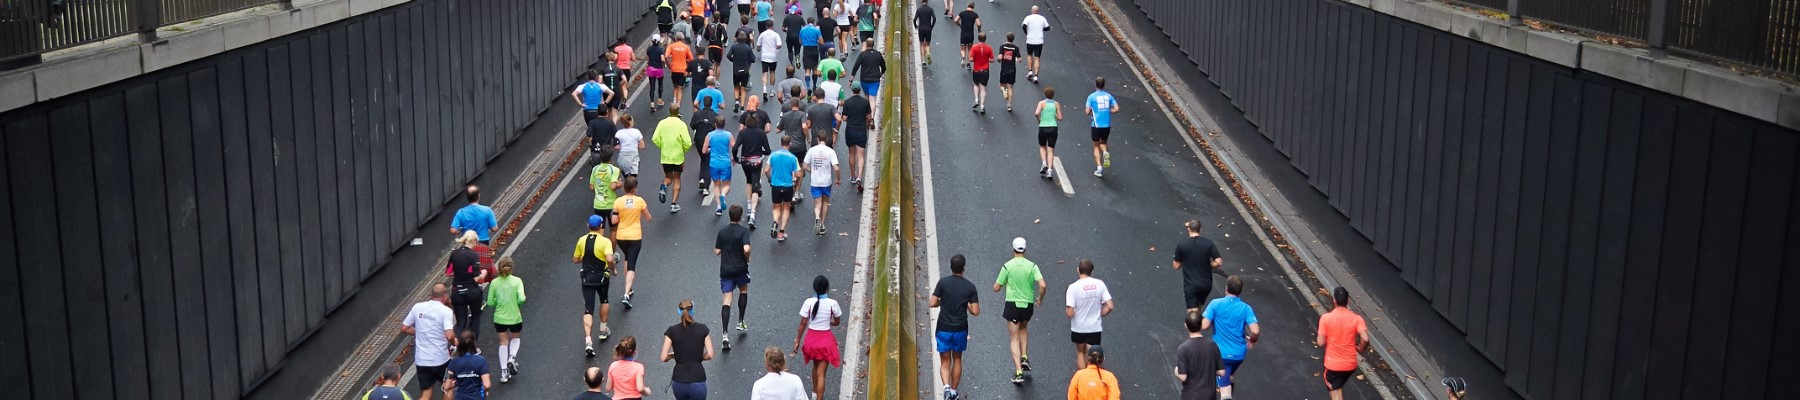

-------

# **BUSINESS CASE**


**To Create a predictive model to classify whether a person is running or walking based on the given predictor variables**.

_**IMPORTING ALL THE NECESSARY LIBRARIES**_

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# for avoid warnings
import warnings 
warnings.filterwarnings('ignore')

-----

_**LOAD THE DATA**_

In [7]:
data=pd.read_csv('walkrun.csv')

-----

## **DOMAIN ANALYSIS**

_Domain analysis is a critical step in any project, including a walking vs. running classification project based on the
provided data attributes. It involves gaining a deep understanding of the domain in which the project operates._ 

_**Domain Description**_:

-  **Domain**: _Human motion analysis and activity recognition using wearable sensors._  

-  **Context**: _The project aims to classify human activities (walking and running) based on sensor data collected 
    from wearable devices._    
    
-  **Key Stakeholders**: _Researchers, data scientists, fitness app developers, wearable device manufacturers._    

    
-  _**Data Attributes**_:  

-  1) **Date and Time**: _These attributes provide the timestamp for each recorded data point. They may be useful for 
    analyzing patterns over time and establishing when the activities occurred._  

-  2) **Username**: _Indicates the user associated with the data. It could be relevant for user-specific analysis or 
    personalized activity recommendations._  

-  3) **Wrist**: _Specifies the wrist (left or right) where the wearable sensor was placed. This attribute can impact 
    the sensor data due to differences in motion patterns between wrists._  

-  4) **Activity**:_The target variable, representing the activity being performed (walking or running). This is the 
   label you're trying to predict._

-  5) **Acceleration (X, Y, Z)**: _These attributes provide acceleration data in three axes (X, Y, and Z). They are 
    crucial for understanding the movement patterns of walking and running._  

-  6) **Gyroscope (X, Y, Z)**: _Gyroscope data captures angular velocity around the X, Y, and Z axes. It can help in 
    identifying the rotational aspects of activities._





_**BASIC CHECKS**_

In [419]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [420]:
pd.set_option('display.max_column',None)

In [421]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [422]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [423]:
data.sample(5)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
27300,2017-7-16,14:2:48:283406019,viktor,1,0,-0.2400,-1.0700,-0.2959,1.8280,0.3042,-1.6876
52774,2017-7-17,20:3:19:685908973,viktor,1,1,-1.2035,-0.1192,0.2242,1.0994,-0.7942,-0.2491
35348,2017-7-16,14:9:11:567358016,viktor,1,0,-0.1979,-0.7734,-0.1149,-0.9121,-0.5926,0.8093
72261,2017-7-6,18:47:37:811351001,viktor,0,1,0.8157,0.1537,-0.6565,-1.1495,-0.4918,-3.0887
79126,2017-7-7,11:51:56:281637012,viktor,0,0,0.2355,-0.7856,-0.1006,-1.6853,0.0674,-1.5501


In [424]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [425]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


- . _"count" prints the number of rows excluding null values. As all of the above features have their count values the same as total rows, there are no null values._
- . _"wrist" and "activity" are nominal features._
- . _"wrist" refers to the hand on which the device was worn while recording, it can take only two values i.e., 0 for "left" and 1 for "right"._  
- . _"activity" refers to the physical activity being performed during recording, 0 for "walk" and 1 for "run"._
- . _For binary variables, "mean" can give valuable information on skewness. Mean values of "wrist" and "activity" are roughly around 0.5 indicating the sample collection is not heavily skewed towards one of the values._  
- . _The remaining six features are (x,y,z) acceleration & orientation values measured by the device, and they are ratio features._  
- . _Percentile & mean values provide a decent understanding of the skewness for ratio features. If mean is closer to 25th or 75th percentiles more than 50th percentile, that indicates an underlying skewness in the distribution._  
- . _Quick glance tells us that "acceletation_y", "acceleration_z" have skewness in their distribution.
- . _In data visualization section, we'll look at the distributions of these features._

In [426]:
data.describe(include="O")#gives the data insights regarding categorical values/data

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [427]:
data.shape

(88588, 11)

In [428]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

_NO null values are present in the data set_

In [429]:
columns = list(data.columns)
print(columns)

['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


In [430]:
data.ndim#gives the dimension of the dataframe

2

In [431]:
 data['activity'].unique()

array([0, 1], dtype=int64)

In [432]:
print(data['activity'].value_counts())


1    44365
0    44223
Name: activity, dtype: int64


In [8]:
numeric_columns=['wrist','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']

In [9]:
numerical_data = data[numeric_columns]

In [10]:

numerical_data.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


---------

## **EXPLORATORY DATA ANALYSIS**

_IN EDA we basically understand our data by plotting graphs and analyze them on that basis which gives us a broad view of data and we can check outlier deviation and all the neccesary info for upcoming procedures so it is one of the important part of process we basically do three types of analysis as:_

1). Univariate analysis

2). Bivariate Analysis and

3)Multivariate analysis

* Univariate Analysis: In univariate analysis we get the unique labels of categorical features, as well as get the range & density of numbers.

*  Bivariate Analysis: In bivariate analysis we check the feature relationship with target veriable.

*  Multivariate Analysis: In multivariate Analysis check the relationship between two veriable with respect to the target veriable.

Library Used: Matplotlib & Seaborn


## **EDA**

_**UNIVARIATE ANALYSIS**_

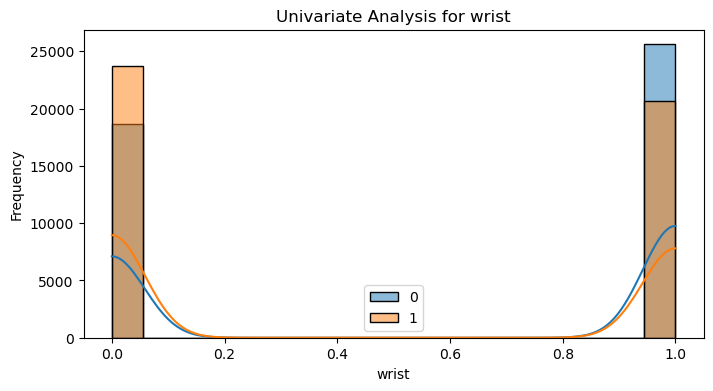

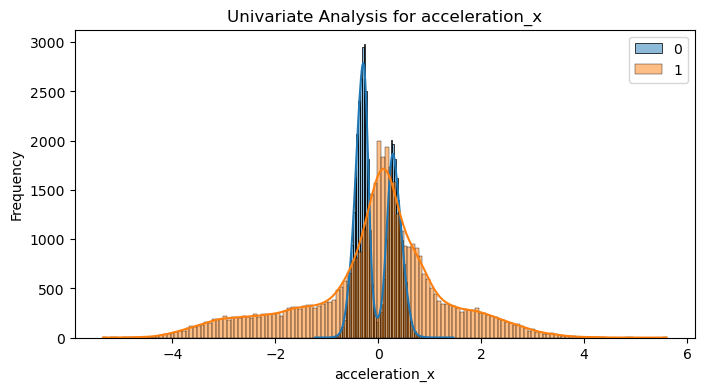

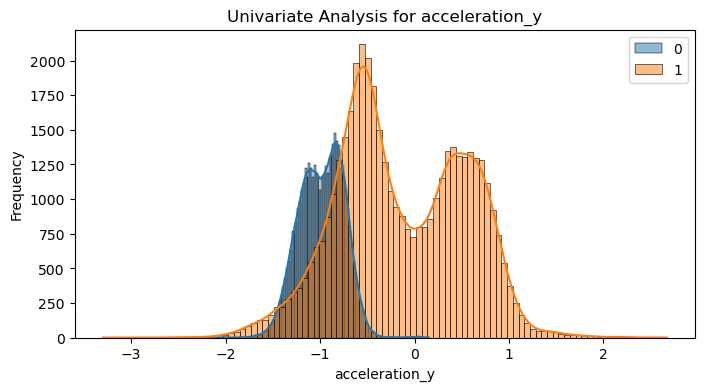

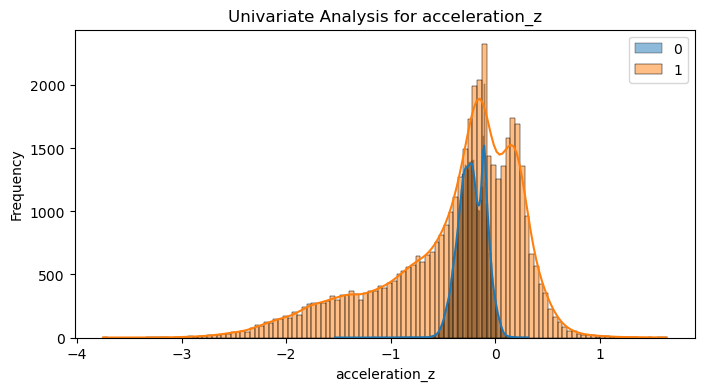

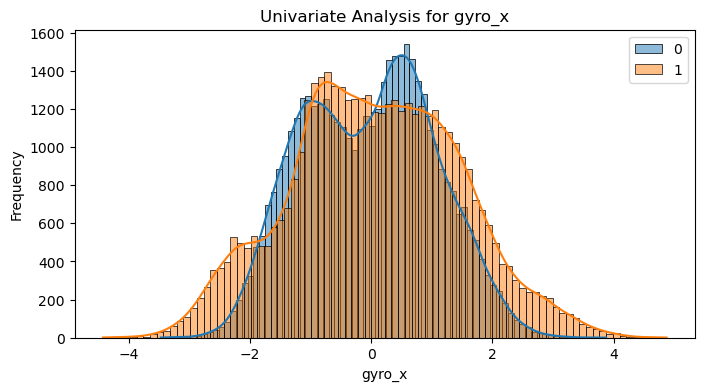

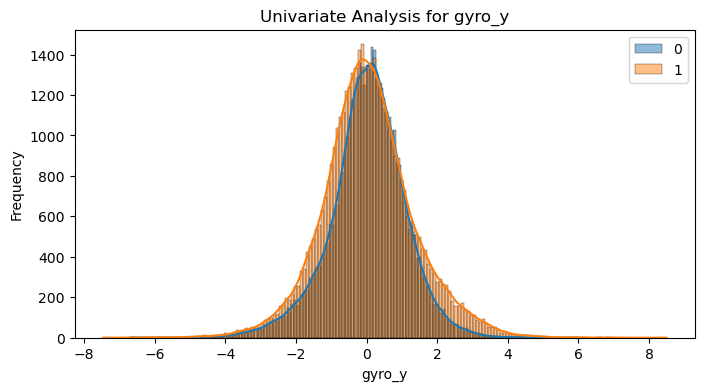

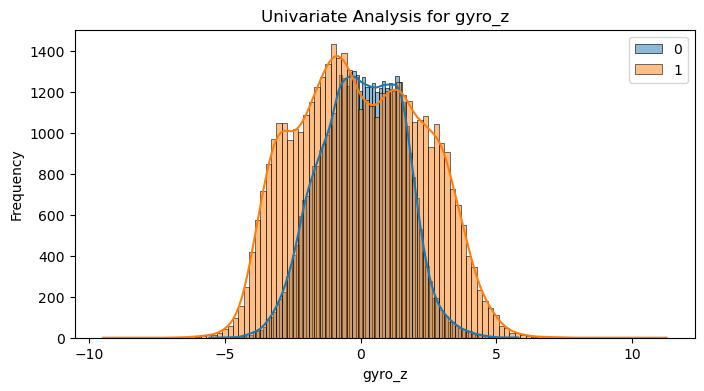

In [11]:
for feature in numerical_data:
    plt.figure(figsize=(8, 4))
    
    # Create a separate plot for each class (activity)
    for activity in data['activity'].unique():
        subset = data[data['activity'] == activity]
        sns.histplot(subset[feature], kde=True, label=activity)
    
    plt.title(f'Univariate Analysis for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.show()



_**INSIGHTS FROM UNIVARIENT ANALYSIS**_

_In this Blue represents the walking acitivity and orange represents the running activity based on the persons data_  
- **wrist**:- from the plotting we conclude there is skewness present the this data and at the middle there is no value and the data is skewed to the left side .  
- **acceleration_x**:- _from the graphical representation we can sya that orange graph i.e for running activity of a person is normally distributed where as walking is not and also 0.62 % data is left side skewed _  
- **acceleration_y**:- _from this graph it not properly distributed and continuosly overlapping and data is Right side skewed  0.91 value._  
- **acceleration_z**_:- _from this graph we can say that the graph is left side skewed_  
- **gyro_x**_:- _data is overlapping but we can say that it is not skwed.  
- **gyro_y**_:- _data is left side skewde.and minimum outliers are present.
- **gyro_z**_:- _data is having some outliers but evenly distributed not skewed to any of aside_  

_**BIVARIENT ANALYSIS**_    

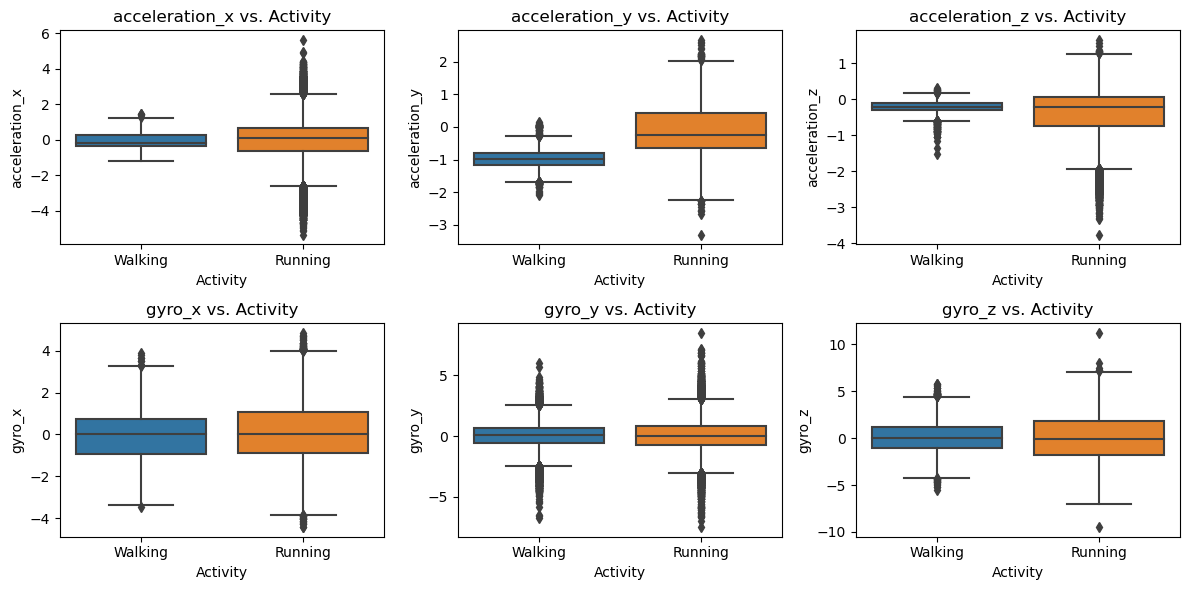

In [436]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x='activity', y=feature)
    plt.title(f"{feature} vs. Activity")
    plt.xlabel("Activity")
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Walking', 'Running'])
plt.tight_layout()
plt.show()

_**INSIGHTS FROM BIVARIENT ANALYSIS**_

- _The horizontal line inside each box represents the median value of the data for the respective activity._  
- _The height of the box represents the IQR, which contains the middle 50% of the data. A taller box indicates higher variability in the data._  
- _The lines extending from the boxes (whiskers) show the range of the data, excluding outliers. Outliers, if present, are shown as individual points outside the whiskers._  
- _Each box plot is labeled with the feature name on the y-axis and "Activity" on the x-axis, making it clear which feature is being examined._   

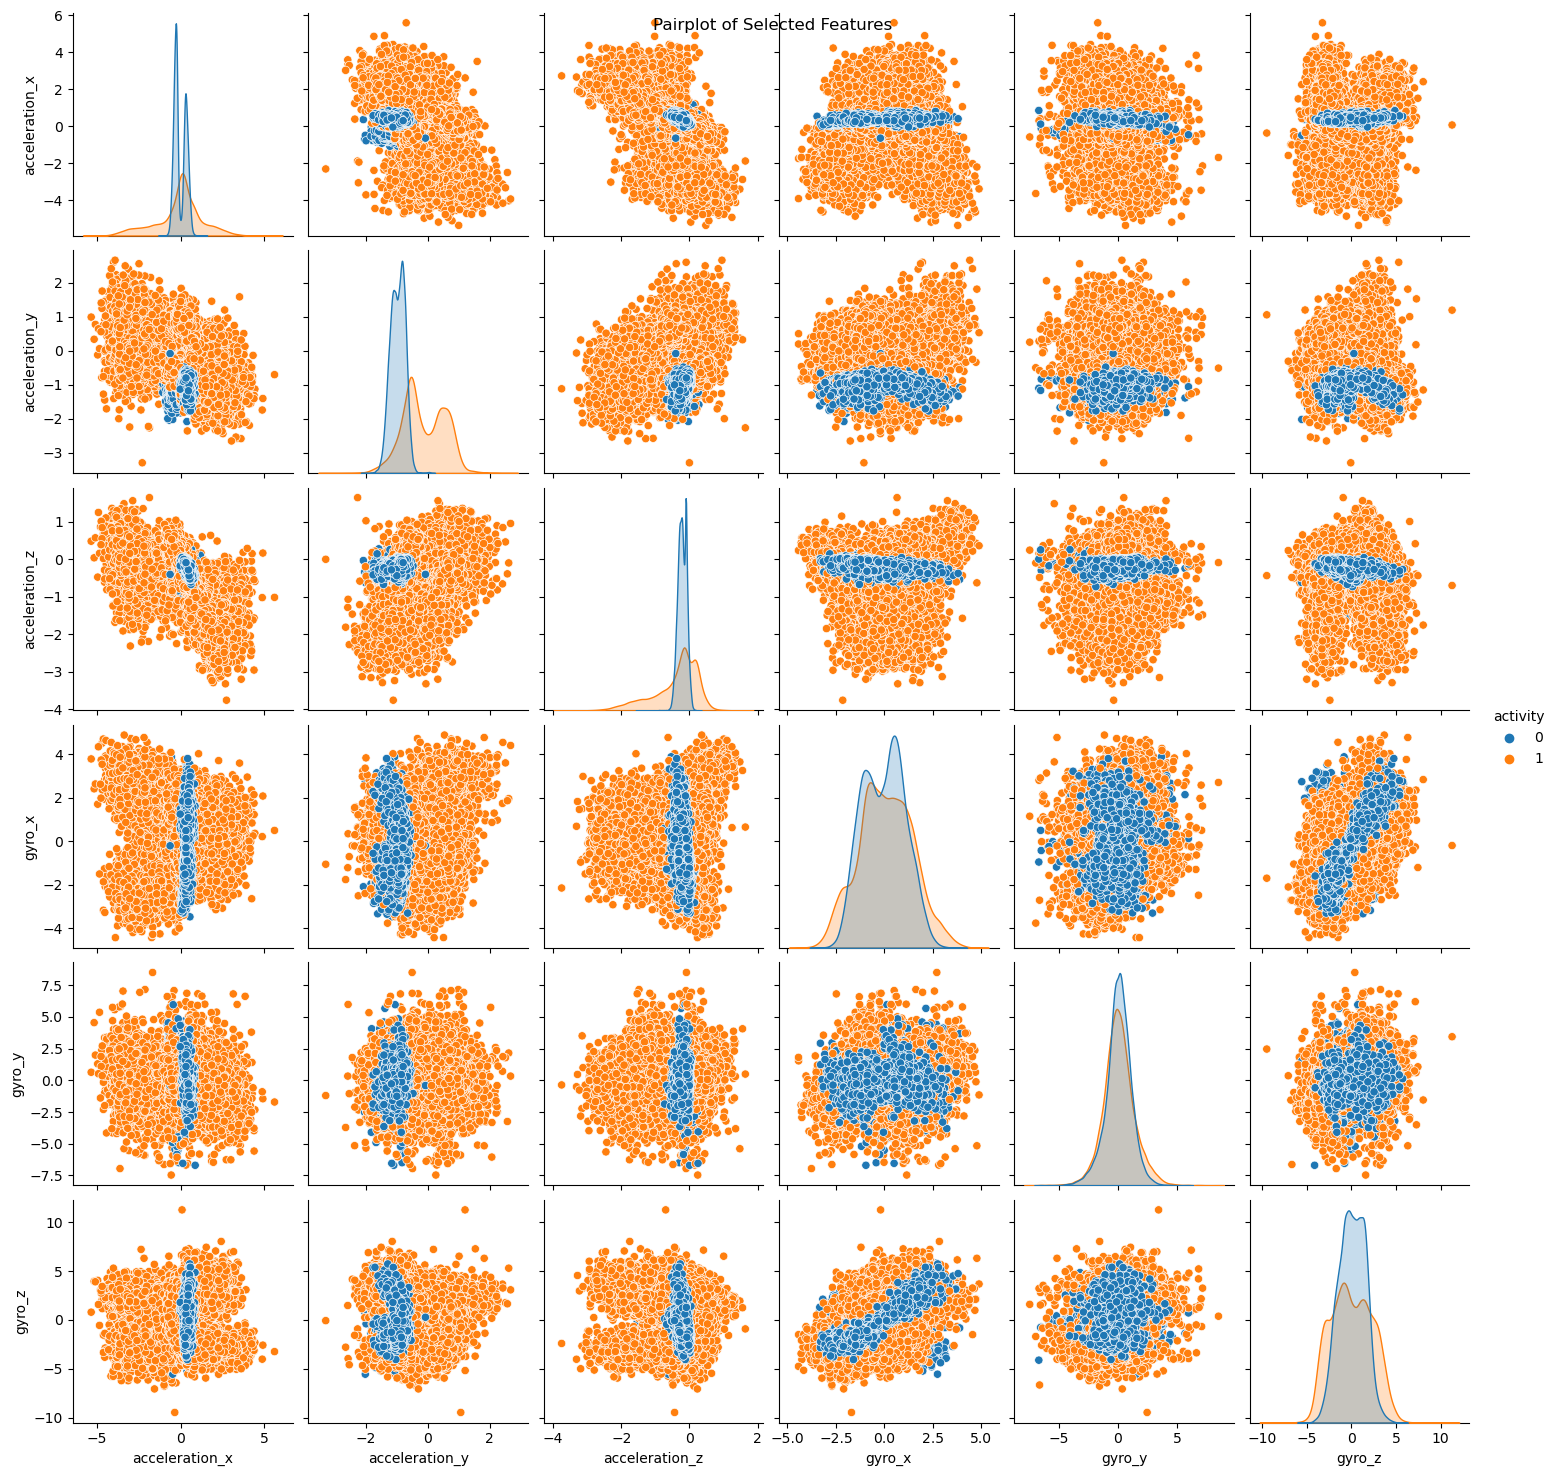

In [437]:
selected_features = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'activity']
sns.pairplot(data=data[selected_features], hue='activity', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features")
plt.show()


CREATING DATE-TIME

In [36]:

data_date_reformat = data["date"].str.split("-", expand=True) #reformating date time column


data_time_reformat = data["time"].str.split(":", expand=True)

#to join we used concat function 
data_date_time_reformat = pd.concat([data_date_reformat, data_time_reformat], axis=1)
data_date_time_reformat.columns = ["year","month", "day", "hour", "minute", "second", "ns"] #rename columns

In [37]:
data_date_time_obj = pd.to_datetime(data_date_time_reformat)#creating an object


In [38]:
#add datetime object to a new dataframe and set it as index
data_sorted = data.copy()
data_sorted["datetime"] = data_date_time_obj
data_sorted.set_index("datetime", inplace=True)

In [39]:
data_sorted.drop(axis=1, columns=["username"], inplace=True) # droping username column

In [42]:
data_sorted

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
2017-06-30 13:51:16.246945023,2017-6-30,13:51:16:246945023,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2017-06-30 13:51:16.446233987,2017-6-30,13:51:16:446233987,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
2017-06-30 13:51:16.646117985,2017-6-30,13:51:16:646117985,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
2017-06-30 13:51:16.846738994,2017-6-30,13:51:16:846738994,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...
2017-07-17 20:16:02.884990990,2017-7-17,20:16:2:884990990,1,1,-0.3145,-0.5619,0.2554,-1.4393,0.1370,-1.5961
2017-07-17 20:16:03.085111975,2017-7-17,20:16:3:85111975,1,1,-2.1825,0.1876,0.0430,-2.2937,-0.6059,-0.6293
2017-07-17 20:16:03.285188019,2017-7-17,20:16:3:285188019,1,1,0.2041,0.4117,-0.1134,0.8280,0.8089,1.9331


In [43]:
print("*** last row timestamp before sorting ***")
print(data_sorted.index[-1])
#sort df_sorted data by "datetime" index
data_sorted.sort_index(inplace=True)
print("*** last row timestamp after sorting ***")
print(data_sorted.index[-1])

*** last row timestamp before sorting ***
2017-07-17 20:16:03.684989988
*** last row timestamp after sorting ***
2017-07-17 20:16:03.684989988


 _As in Newly created dataframe "data_sorted" is sorted by datetime, and column username has been dropped. and it is better for visualization purpose_

In [44]:
data_sorted.head()

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
2017-06-30 13:51:16.246945023,2017-6-30,13:51:16:246945023,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2017-06-30 13:51:16.446233987,2017-6-30,13:51:16:446233987,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
2017-06-30 13:51:16.646117985,2017-6-30,13:51:16:646117985,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
2017-06-30 13:51:16.846738994,2017-6-30,13:51:16:846738994,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [45]:
print("Start time of data recording ->", data_sorted.index.min())
print("End time of data recording ->", data_sorted.index.max())
print("Number of days of data collection ->", data_sorted.index.day.nunique())
print("Days of data collection ->", data_sorted.date.unique())

Start time of data recording -> 2017-06-30 13:51:15.847724020
End time of data recording -> 2017-07-17 20:16:03.684989988
Number of days of data collection -> 12
Days of data collection -> ['2017-6-30' '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7'
 '2017-7-9' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17']


_Data was collected on 12 days printed above between June 30, 2017 and July 17, 2017_

-----

_**DATE- TIME FEATURE COLUMN ANALYSIS**_

In [46]:
from matplotlib.ticker import FormatStrFormatter

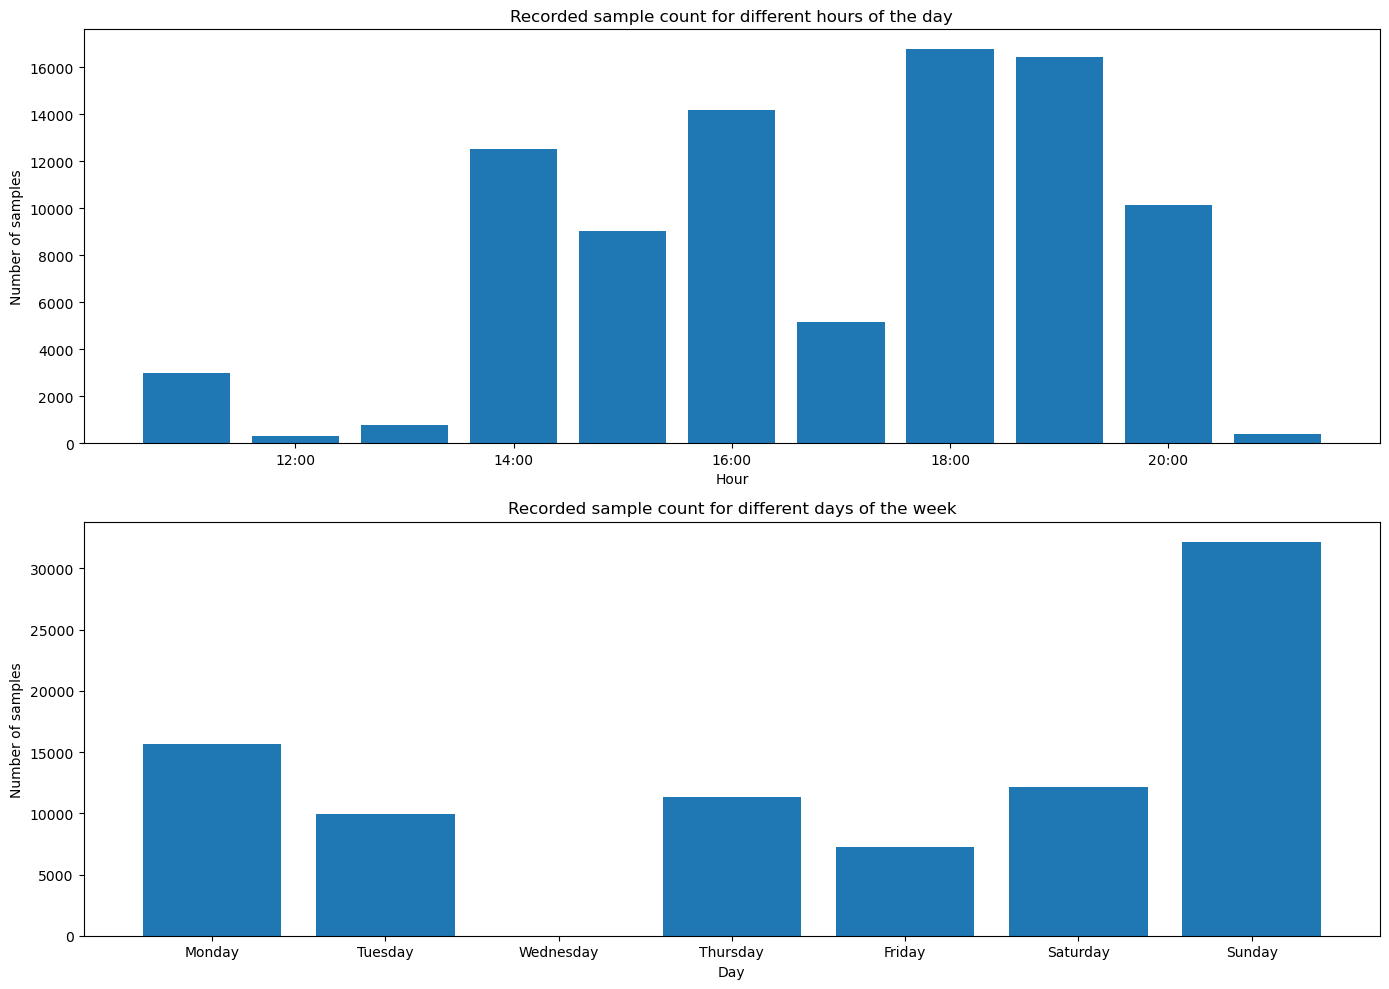

In [47]:
#visualization of user activity pattern
f, ax =  plt.subplots(ncols=1, nrows=2, figsize = (14,10))

#sample count vs hour of day
arr_hr = np.unique(data_sorted.index.hour, return_counts = True)
ax[0].bar(arr_hr[0], arr_hr[1])
ax[0].set_title("Recorded sample count for different hours of the day")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Number of samples")
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%d:00'))

#sample count vs day of week
arr_day = np.unique(data_sorted.index.dayofweek, return_counts = True)
ax[1].bar(arr_day[0], arr_day[1])
ax[1].set_title("Recorded sample count for different days of the week")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Number of samples")
ax[1].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

f.tight_layout()
f.show()

_**INSIGHTS**_

- _Hours of day: Most of the samples were recorded between 2pm and 8pm with the highest count coming from 6pm. The dip in sample count at 5pm looks out of place and worth noting._
- _Days of week: Sunday dominates the sample count which could be due to it being no work day. Rest of the days have similar sample counts except for Wednesday which has zero._

_**WRIST AND ACTIVITY ANALYSIS**_

In [48]:
#temporary dataframe with "wrist" and "activity" column values replaced
data_sorted_viz =  data_sorted.copy()
data_sorted_viz["wrist"].replace(to_replace={0:"left", 1:"right"}, inplace=True)
data_sorted_viz["activity"].replace(to_replace={0:"walk", 1:"run"}, inplace=True)
#sanity check to see if values were updated correctly
print("Updated unique values")
for each_col in ["wrist", "activity"]:
    print(each_col,":", data_sorted_viz[each_col].unique())
data_sorted_viz.head(1)

Updated unique values
wrist : ['left' 'right']
activity : ['walk' 'run']


,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,left,walk,0.265,-0.7814,-0.0076,-0.059,0.0325,-2.9296


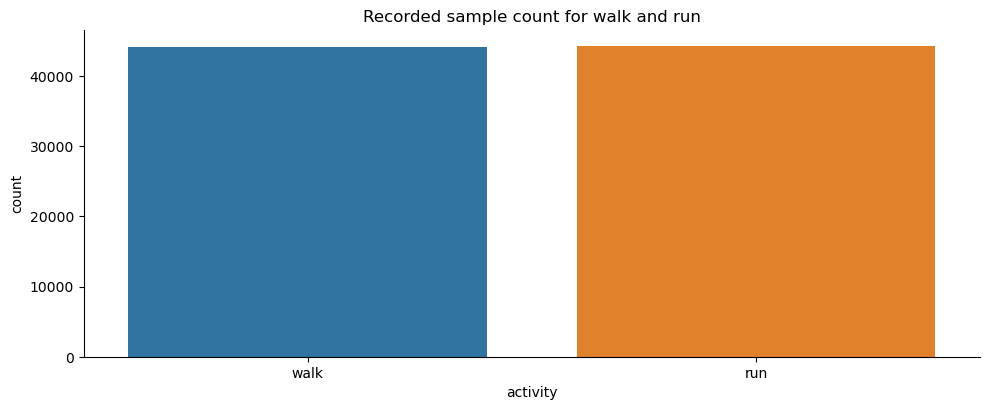

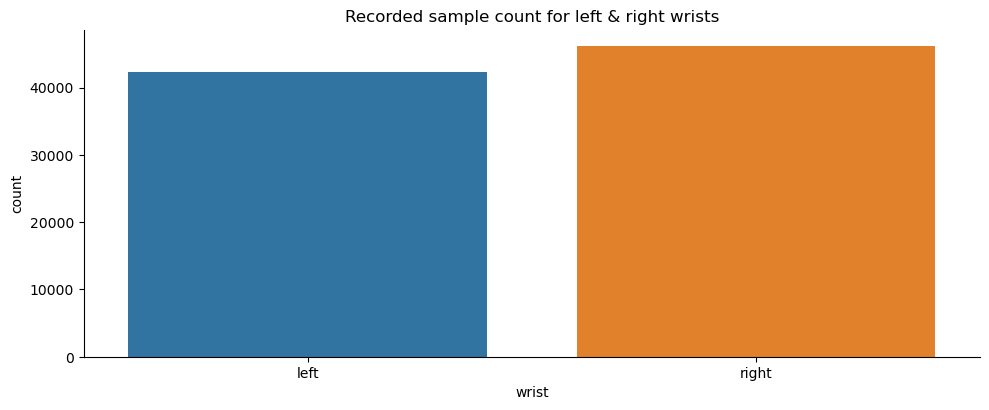

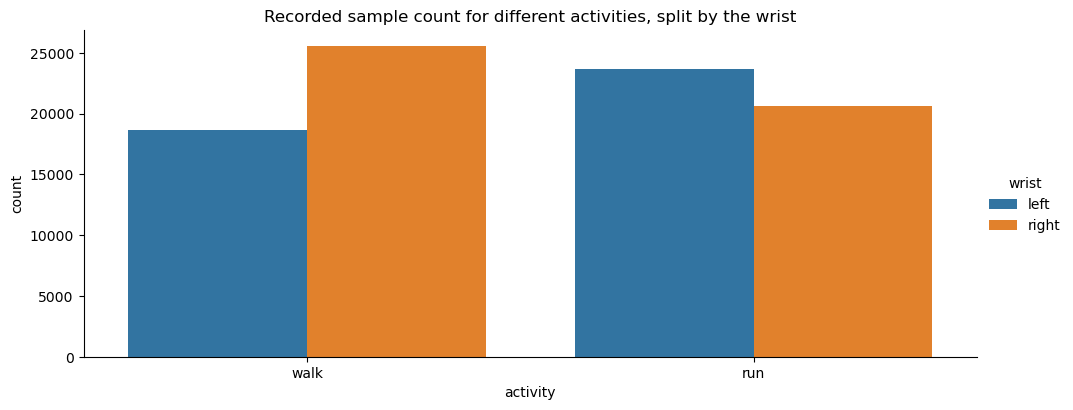

In [49]:
#visualizing counts of "activity" and "wrist" features
plt_ht = 4
plt_asp = 2.5
#first plot
g_act = sns.catplot(x = "activity", kind = "count", height = plt_ht, aspect = plt_asp, data=data_sorted_viz)
g_act.ax.set_title("Recorded sample count for walk and run")
#second plot
g_wrist = sns.catplot(x = "wrist", kind = "count", height =plt_ht, aspect = plt_asp, data=data_sorted_viz)
g_wrist.ax.set_title("Recorded sample count for left & right wrists")
#third plot
g_act_wri = sns.catplot(x = "activity", kind="count", hue = "wrist", height = plt_ht, aspect = plt_asp, data=data_sorted_viz)
g_act_wri.ax.set_title("Recorded sample count for different activities, split by the wrist")
plt.show()

- _Here we have createed a temporary dataframe by replacing "wrist" column values (0 with "left" and 1 with "right") and "activity" column values (0 with "walk" and 1 with "run") as it helps make the charts more intuitive._

- _Distribution is roughly even for different "activity", "wrist" values, maybe a bit skewed towards right wrist but not by much._
- _The third chart above illustrates that for walk we have more samples for right wrist and vice-versa for run._

_**DISTRIBUTION PLOTS OF ACCELEROMETER AND GYROSCOPE DATA**_

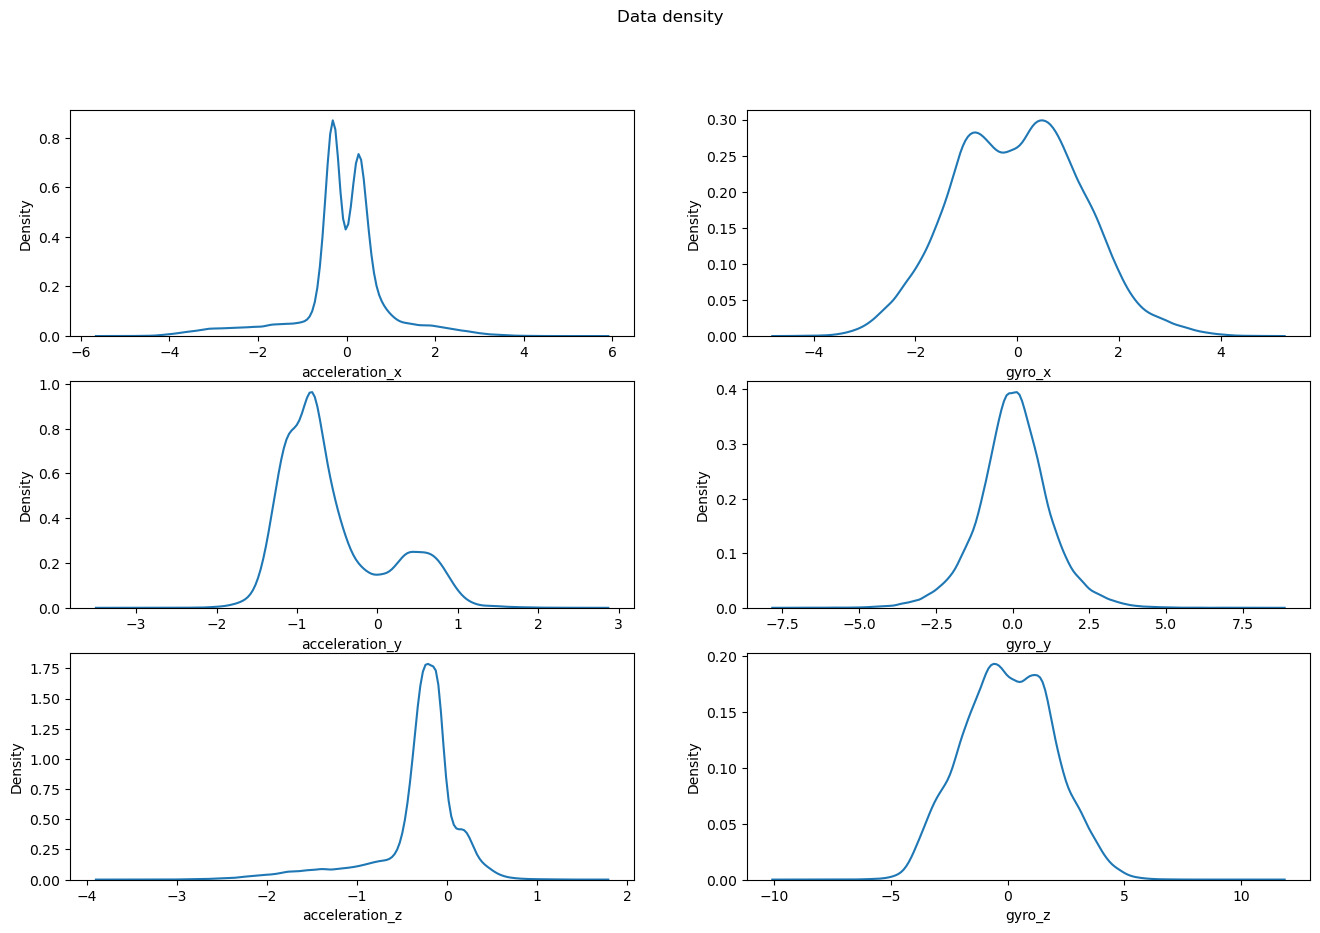

In [50]:
fig_kde, ax_kde = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
ax_num = 0
for each_col in data.columns.values[5:11]:
    g_kde = sns.kdeplot(data_sorted_viz[each_col], ax=ax_kde[ax_num % 3][ax_num // 3])
    ax_num += 1
fig_kde.suptitle("Data density")
#fig_kde.tight_layout()
fig_kde.show()

- _For x-axis, accelerometer data is roughly symmetric and the double peak pattern is because of two "wrist" values. Same behavior is noticed in gyroscope data._
- _For y-axis, gyroscope data has normal distribution with mean = 0. Accelerometer data on the other hand looks skewed, and has the most inconsistent distribution among all the ratio features._
- _For z-axis, gyroscope data looks symmetric. Accelerometer data is slightly skewed but not as much as y-axis data._

-------

_**VISUALIZING ACTIVITY SPLIT ACCELEROMETER AND GYROSCOPE DATA**_

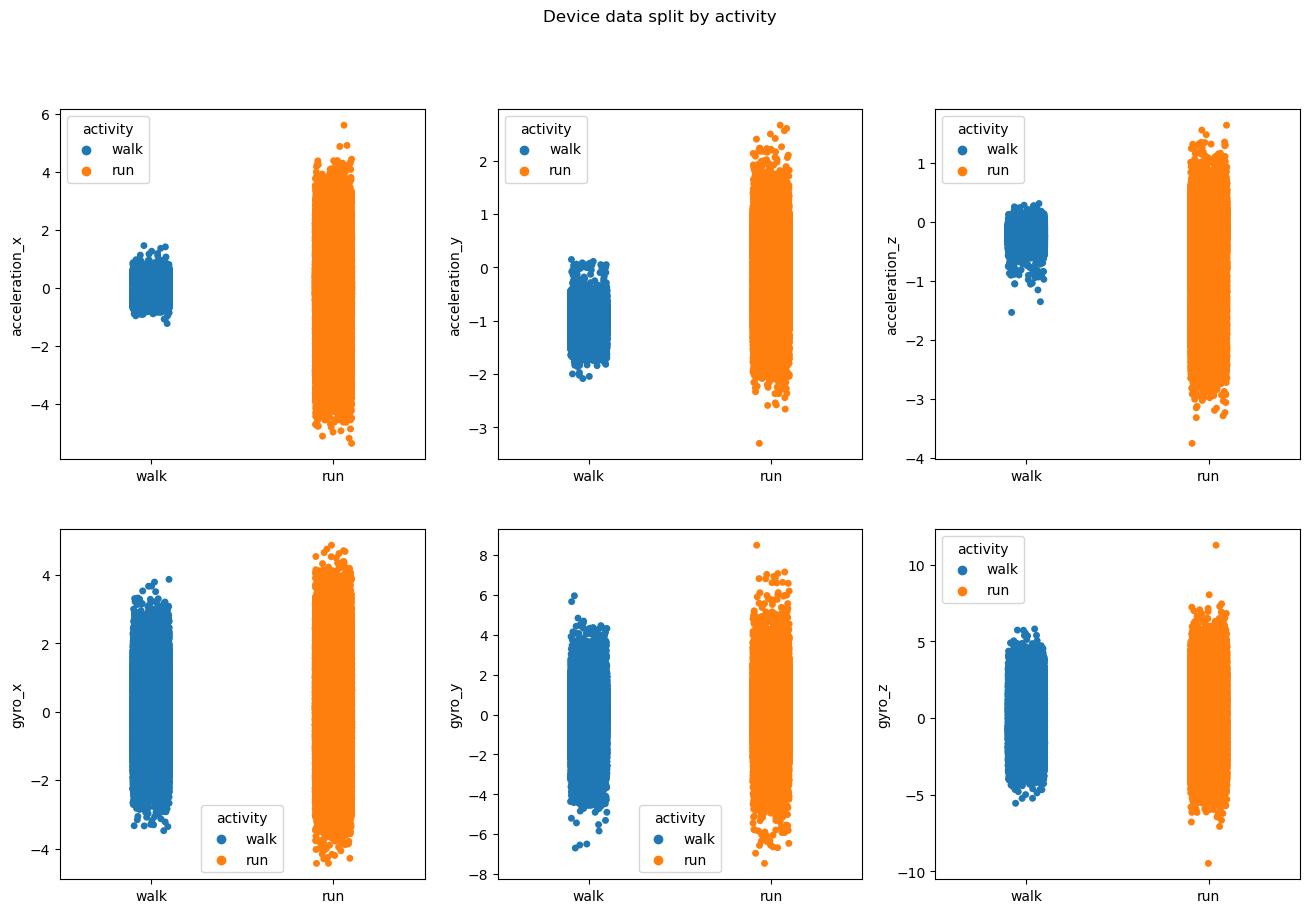

In [51]:
fig_str, ax_str = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig_str.suptitle("Device data split by activity")    
ax_num = 0
for each_col in data.columns.values[5:11]:
    g_str = sns.stripplot(x = "activity", y = each_col, hue = "activity", ax=ax_str[ax_num // 3][ax_num % 3], data = data_sorted_viz)
    ax_num += 1
    g_str.set_xlabel("")
#fig_str.tight_layout()
fig_str.show()

- _"acceleration_x", "acceleration_z" show clear differentiation between walking and running, with running yielding much higher(+ve, -ve based on the wrist) values._  
- _"acceleration_y" shows some separation but not as pronounced as the two other dimensions._  
- _"gyroscope" data on the other hand look quite similar for walking and running._
- _For predictive analysis, acceleration_x could be the most important feature because of it's data distribution quality and ability to differentiate "activity". Although acceleration_x, acceleration_z do show sepration, they suffer from some inconsistencies in data distribution which might hamper their prominence. It'll be interesting to see the effects of gyroscope data._


<div style="background-color:#F5F5F5 ; padding:10px">
<h3>CHECKING OUTLIERS</h3>
</div>

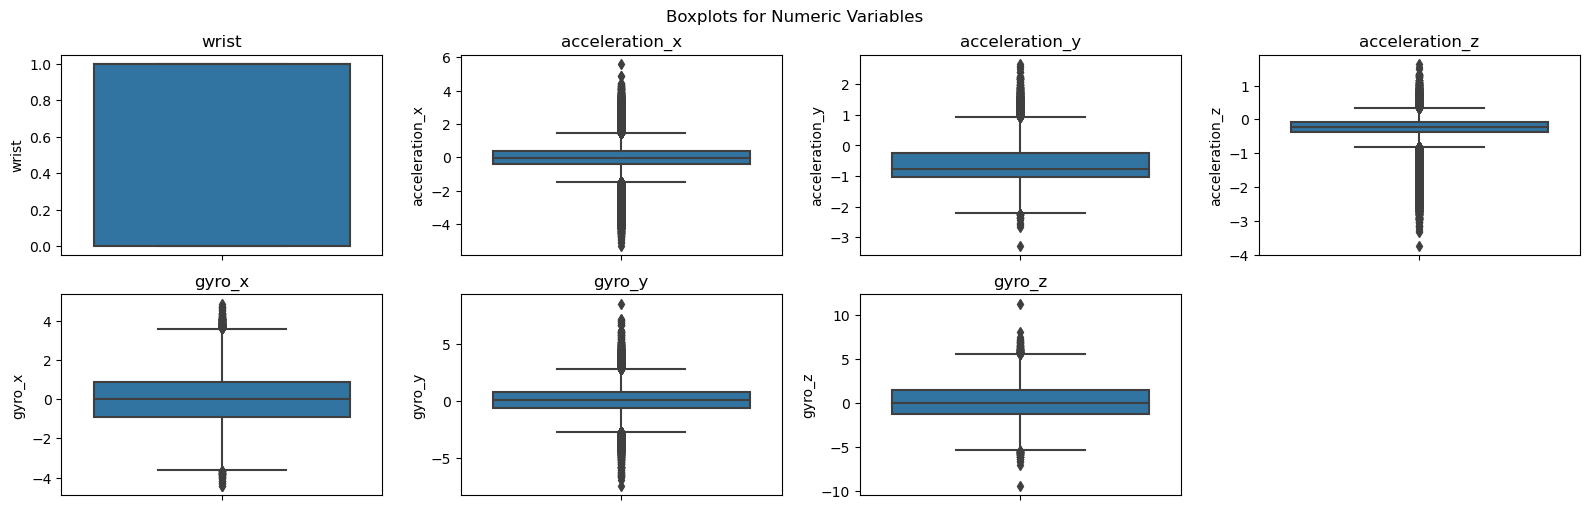

In [56]:

# Create subplots
plt.figure(figsize=(16, 10))
plt.suptitle("Boxplots for Numeric Variables")

for i, column in enumerate(numerical_data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

_**Handling outliers in a project like a walking vs. running classification task is crucial because outliers can negatively impact the performance of your machine learning model. Becuase of this we will predict based on the original one only**_

### **CHECKING SKEWNESS**


In [59]:
from scipy import stats

# Calculate skewness for each numeric variable
skewness_results = {}

for column in numerical_data.columns:
    skewness = stats.skew(data[column])
    skewness_results[column] = skewness

# Display the skewness results
for column, skewness in skewness_results.items():
    print(f"{column}: Skewness = {skewness:.2f}")

wrist: Skewness = -0.09
acceleration_x: Skewness = -0.62
acceleration_y: Skewness = 0.91
acceleration_z: Skewness = -1.84
gyro_x: Skewness = 0.07
gyro_y: Skewness = -0.02
gyro_z: Skewness = 0.04


_**BEFORE CHECKING SKEWNESS**_

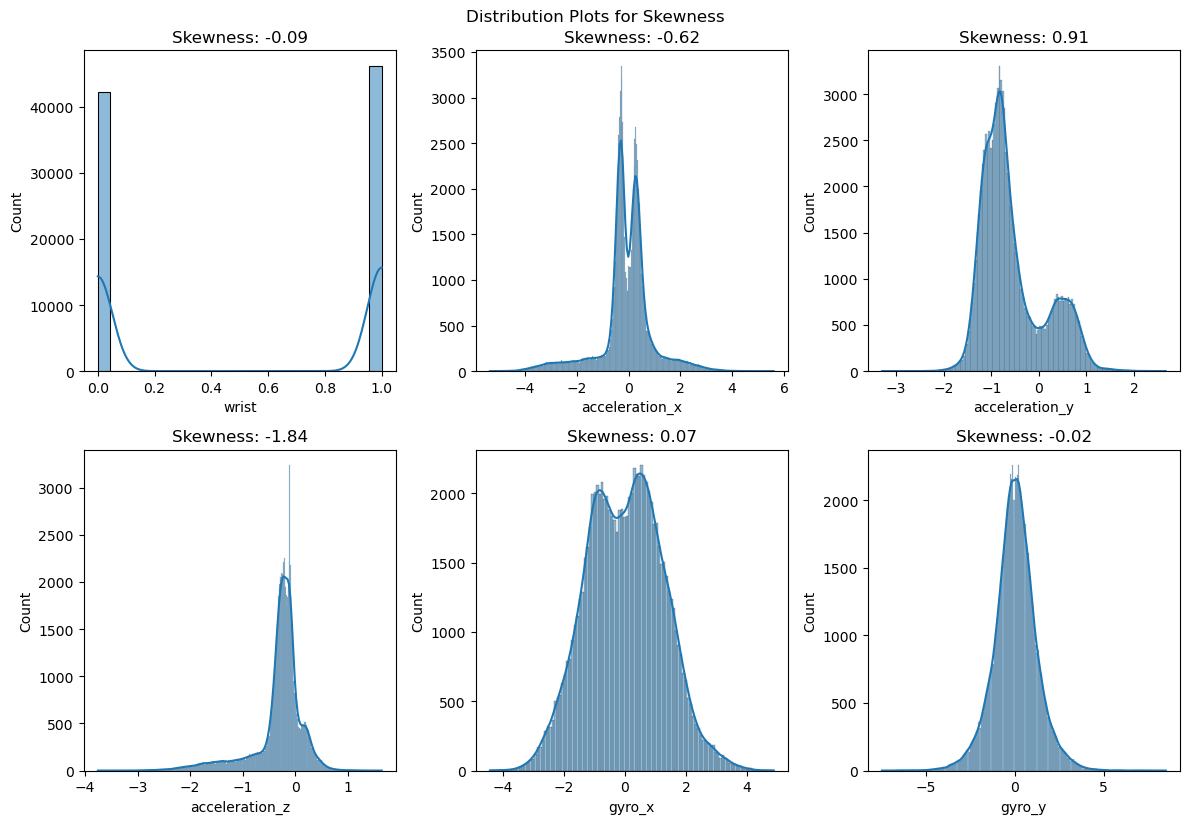

In [61]:


# Determine the number of subplots and rows
num_plots = len(numerical_data.columns)
num_rows = (num_plots + 2) // 3  # Adjust the number of rows as needed

# Create subplots for each numeric variable (up to 6 subplots)
plt.figure(figsize=(12, 4 * num_rows))
plt.suptitle("Distribution Plots for Skewness")

for i, column in enumerate(numerical_data.columns[:6]):  # Limit to 6 subplots
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data[column], kde=True)  # Create a distribution plot with KDE
    plt.title(f"Skewness: {data[column].skew():.2f}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [15]:


# Store skewness values before transformation
skewness_before = {}

# Apply skewness reduction techniques to each numeric data
for feature in numerical_data:
    # Calculate skewness before transformation
    skewness_before[feature] = data[feature].skew()
    
    # Apply cube root transformation (you can choose other methods as well)
    data[feature] = np.cbrt(data[feature])

# Store skewness values after transformation
skewness_after = {feature: data[feature].skew()for feature in numerical_data}

_**GRAPH AFTER TRANSFORMING SKEWNESS**_

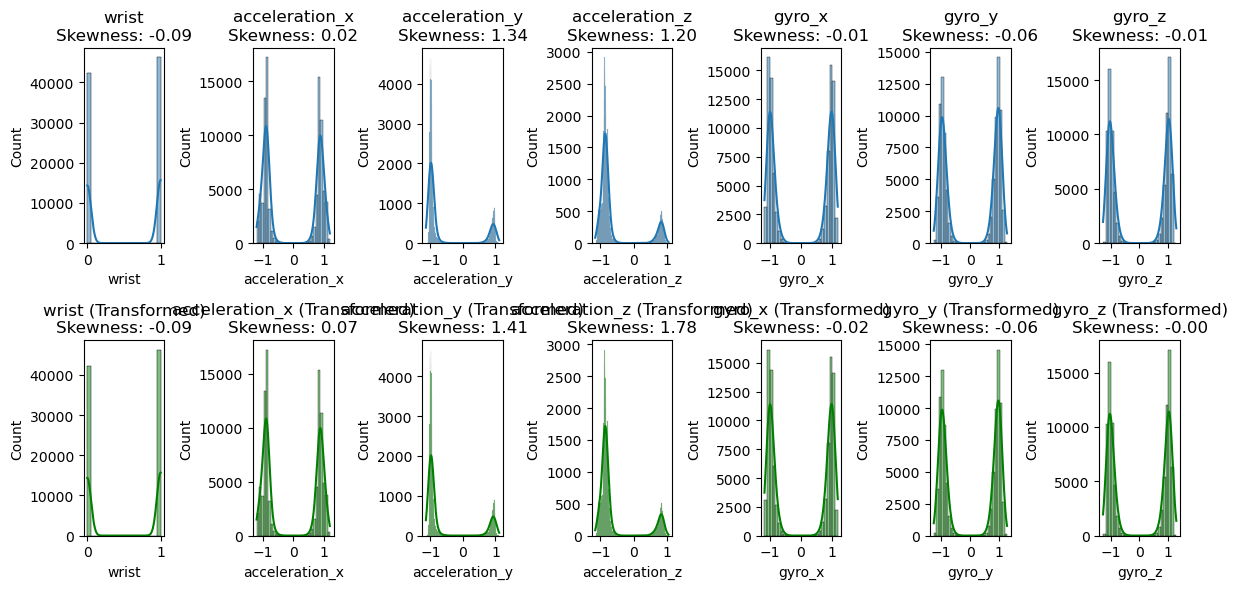

In [67]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_data):
    plt.subplot(2, len(numeric_data), i + 1)
    sns.histplot(data[feature], kde=True)  # Create a distribution plot with KDE
    plt.title(f'{feature}\nSkewness: {skewness_before[feature]:.2f}')

    plt.subplot(2, len(numeric_data), len(numeric_data) + i + 1)
    sns.histplot(data[feature], kde=True, color='green')  # Create a distribution plot with KDE
    plt.title(f'{feature} (Transformed)\nSkewness: {skewness_after[feature]:.2f}')

plt.tight_layout()
plt.show()


In [68]:
data = data.drop(["date", "time", "username"], axis=1)
data.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0,0.862812,-0.972965,-0.581480,-0.730177,0.683367,-1.126854
1,0.0,0,0.956826,-1.013003,-0.851129,-0.824301,0.650307,0.795032
2,0.0,0,0.912794,-1.044656,0.746742,-0.989636,0.779538,-1.104023
3,0.0,0,0.875787,-0.977193,0.764112,0.790035,-0.905658,-1.127025
4,0.0,0,0.921983,-0.992111,0.690963,0.721073,0.912332,1.106789



### **SPLITTING DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [332]:
X = data.iloc[:, [0, 2, 3, 4, 5, 6, 7]]

In [333]:
X

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0.855857,0.074814,0.260444,0.189555,0.767720,0.060576
1,0.0,0.894772,0.057074,0.138698,0.149879,0.754594,0.801850
2,0.0,0.876546,0.043050,0.860133,0.080184,0.805903,0.069382
3,0.0,0.861228,0.072940,0.867976,0.830376,0.136820,0.060510
4,0.0,0.880350,0.066331,0.834949,0.801306,0.858627,0.922095
...,...,...,...,...,...,...,...
88583,0.0,0.861927,0.071474,0.162239,0.886077,0.925515,0.859947
88584,0.0,0.881764,0.062703,0.110877,0.824518,0.089162,0.205497
88585,0.0,0.878307,0.054697,0.130614,0.058048,0.151839,0.099416
88586,0.0,0.854950,0.070300,0.183951,0.055854,0.860261,0.084100


In [334]:
y = data.activity
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

## **SCALING**


- _Scaling is a preprocessing technique used in data analysis and machine learning to standardize or normalize the range of numerical features. It ensures that different features have similar scales, preventing some features from dominating others during modeling._
- _Here we used standardscalar for our scaling purpose.

In [335]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)


In [336]:
X

array([[-1.04536822,  0.98666993, -0.51753527, ..., -0.75608419,
         0.68530818, -1.10757325],
       [-1.04536822,  1.08958839, -0.56944884, ..., -0.85257136,
         0.65057932,  0.77452983],
       [-1.04536822,  1.04138539, -0.61049065, ..., -1.02205753,
         0.78633401, -1.08521471],
       ...,
       [-1.04536822,  1.04604258, -0.57640626, ..., -1.07588867,
        -0.94419542, -1.00896014],
       [-1.04536822,  0.9842695 , -0.53074507, ..., -1.0812247 ,
         0.9301545 , -1.04784709],
       [-1.04536822,  1.00464458, -0.52097754, ...,  0.80108622,
         1.027491  ,  1.00261015]])


### **CHECKING CORRELATION**


In [337]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

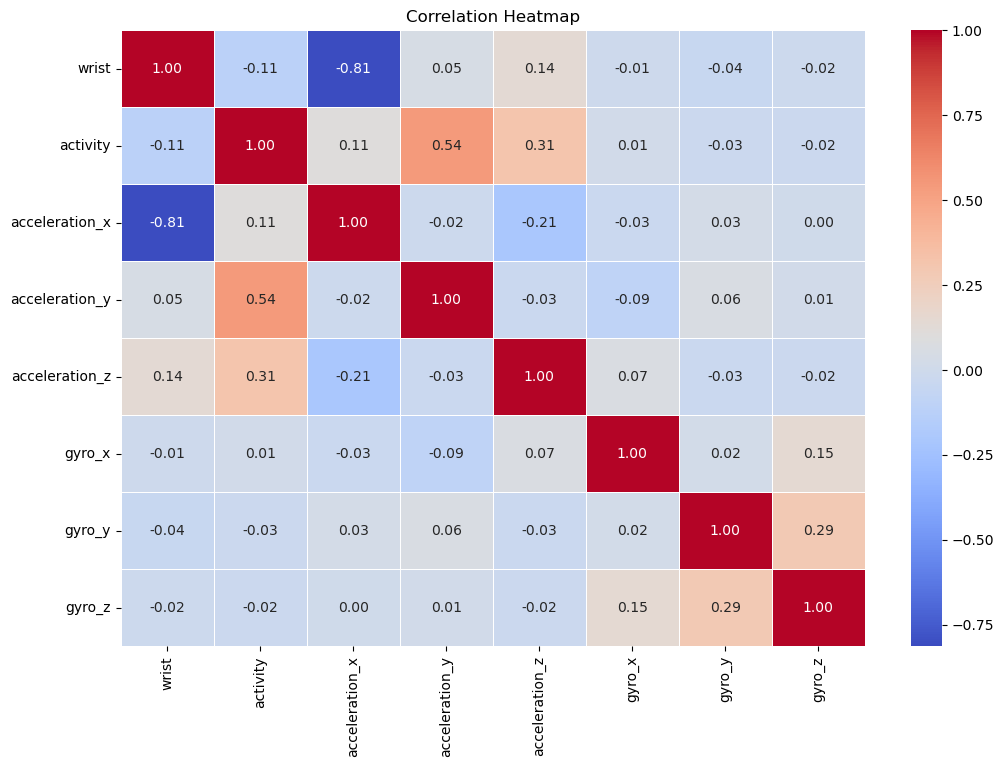

In [338]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

_Here we can say that there is only corelation in between acceleration_x and wrist but we are not going to drop it as it is needed for our model for prediction and not that much of changes will affect_


## **MODEL CREATION**

In [339]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [340]:
X_train

array([[ 1.24707764, -0.55843291, -0.74936866,  0.85364371, -1.21923696,
         1.15041738],
       [-1.07367232,  1.93548698, -0.51423258,  1.06500704, -0.91462217,
         1.10819302],
       [ 1.02373202, -0.55886316, -0.34605026,  1.0219301 ,  1.02640097,
         1.01002554],
       ...,
       [-1.18008444, -0.13255805, -0.52262764,  1.03728226,  1.02282876,
         1.08435739],
       [-0.96277745,  1.95498739, -0.23844678, -1.13042319,  0.95199166,
        -0.95136518],
       [ 1.17851609, -0.5348991 , -0.65588189,  1.03243162, -1.10337796,
        -1.0826365 ]])

In [341]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10) 

In [342]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((66441, 7), (22147, 7), (66441,), (22147,))


### **LOGISTIC REGRESSION**


In [390]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [391]:

logistic_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test)

In [395]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
logistic_reg_acc = accuracy_score(y_test,y_pred)
print(logistic_reg_acc )

[[10320   720]
 [ 2160  8947]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     11040
           1       0.93      0.81      0.86     11107

    accuracy                           0.87     22147
   macro avg       0.88      0.87      0.87     22147
weighted avg       0.88      0.87      0.87     22147

0.8699598139702894


In [396]:
print(logistic_reg_acc )

0.8699598139702894


[[10320   720]
 [ 2160  8947]]


<Axes: >

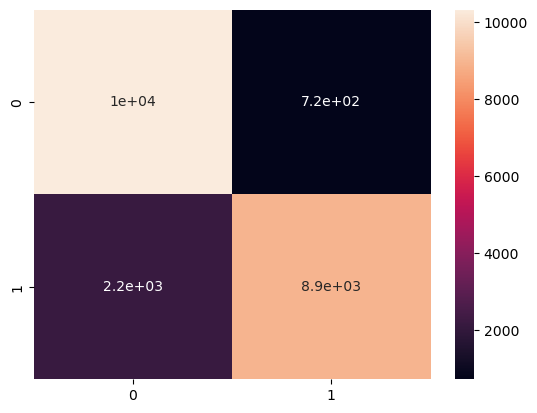

In [347]:
print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True)


### **DECISION TREE**


In [348]:
from sklearn.tree import DecisionTreeClassifier
Desc_tree_class = DecisionTreeClassifier(random_state=42)

In [349]:
# Fit the model to the training data
Desc_tree_class.fit(X_train, y_train)

# Make predictions on the test data
y_pred = Desc_tree_class.predict(X_test)

In [350]:
# Evaluate the model
decision_tree_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.99
Confusion Matrix:
 [[10859   181]
 [  180 10927]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     11040
           1       0.98      0.98      0.98     11107

    accuracy                           0.98     22147
   macro avg       0.98      0.98      0.98     22147
weighted avg       0.98      0.98      0.98     22147



In [351]:
print(decision_tree_accuracy)

0.9836998239039147



### **RANDOM FOREST ALGORITHM**

In [352]:
from sklearn.ensemble import RandomForestClassifier

In [353]:
# Create a Random Forest model
random_for_class = RandomForestClassifier(n_estimators=100, random_state=42)


In [354]:
# Fit the model to the training data
random_for_class.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [361]:
# Make predictions on the test data
y_pred = random_for_class.predict(X_test)


In [362]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
random_for_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.99
Confusion Matrix:
 [[10936   104]
 [   82 11025]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [363]:
print(random_for_accuracy)

0.9916015713189146



### **SUPPORT VECTOR CLASSIFIER**


In [364]:
from sklearn.svm import SVC

In [365]:
# Create an SVM model
support_vec_class = SVC(kernel='linear', C=1.0, random_state=42)

In [366]:
 # Fit the model to the training data
support_vec_class.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [367]:
# Make predictions on the test data
y_pred = support_vec_class.predict(X_test)

In [368]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
support_vec_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.99
Confusion Matrix:
 [[10677   363]
 [ 2438  8669]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88     11040
           1       0.96      0.78      0.86     11107

    accuracy                           0.87     22147
   macro avg       0.89      0.87      0.87     22147
weighted avg       0.89      0.87      0.87     22147



In [369]:
print(support_vec_accuracy)

0.8735268885176322



### **XG BOOST ALGORITHM**


In [146]:
import xgboost as xgb

In [147]:
# Create an XGBoost model
xg_boost_class = xgb.XGBClassifier(objective='multi:softmax', num_classes=len(y.unique()), random_state=42)

In [149]:
# Create an XGBoost model with the correct num_class parameter
num_classes = len(y.unique())  # Get the number of unique classes in your target variable
xg_boost_class  = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42)


In [150]:
# Fit the model to the training data
xg_boost_class.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=2,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [151]:
# Make predictions on the test data
y_pred = xg_boost_class.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
xg_boost_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.99
Confusion Matrix:
 [[10961    79]
 [   79 11028]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [153]:
print(xg_boost_accuracy)

0.9928658509053145



### **CNN MODEL**


In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [253]:
model = Sequential()
model.add(Dense(250, activation = 'relu', input_shape = (6,)))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 250)               1750      
                                                                 
 batch_normalization_10 (Ba  (None, 250)               1000      
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 250)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 251       
                                                                 
Total params: 3001 (11.72 KB)
Trainable params: 2501 (9.77 KB)
Non-trainable params: 500 (1.95 KB)
_________________________________________________________________


In [254]:
model.compile(loss = 'binary_crossentropy', optimizer = 'ADAM', metrics = ['accuracy'])

In [255]:
checkpoint = ModelCheckpoint("walk_run.h5", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             period=1)

early = EarlyStopping(monitor='val_accuracy', 
                      min_delta=0, 
                      patience=7, 
                      verbose=1, 
                      mode='auto')

In [256]:
history = model.fit(X_train, y_train, 
          batch_size = 1000, 
          epochs = 50, 
          validation_split = 0.2,
          callbacks=[checkpoint,early],
          verbose = 2)

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.54338, saving model to walk_run.h5
54/54 - 3s - loss: 0.3767 - accuracy: 0.8213 - val_loss: 0.5521 - val_accuracy: 0.5434 - 3s/epoch - 52ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.54338 to 0.61795, saving model to walk_run.h5
54/54 - 1s - loss: 0.2166 - accuracy: 0.9145 - val_loss: 0.4969 - val_accuracy: 0.6180 - 1s/epoch - 21ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.61795 to 0.83994, saving model to walk_run.h5
54/54 - 1s - loss: 0.1637 - accuracy: 0.9431 - val_loss: 0.4167 - val_accuracy: 0.8399 - 713ms/epoch - 13ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.83994 to 0.89360, saving model to walk_run.h5
54/54 - 1s - loss: 0.1373 - accuracy: 0.9539 - val_loss: 0.3387 - val_accuracy: 0.8936 - 1s/epoch - 24ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.89360 to 0.94221, saving model to walk_run.h5
54/54 - 2s - loss: 0.1211 - accuracy: 0.9592 - val_loss: 0.2809 - val_accuracy: 

In [257]:
print("Evaluate model on test data")

results = model.evaluate(X_test, y_test, batch_size=1000)

print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:

print("Generate a prediction")

prediction = model.predict(X_test[:1])

print("prediction shape:", prediction.shape)

Evaluate model on test data
23/23 [==============================] - 0s 6ms/step - loss: 0.0474 - accuracy: 0.9837
test loss, test acc: [0.047352761030197144, 0.9836997985839844]
Generate a prediction
1/1 [==============================] - 0s 106ms/step
prediction shape: (1, 1)


In [258]:
best_model_acc = history.history['accuracy'][np.argmin(history.history['loss'])]
cnn_acc = best_model_acc

print ("Accuracy for CNN: {}".format(cnn_acc))

Accuracy for CNN: 0.9821455478668213


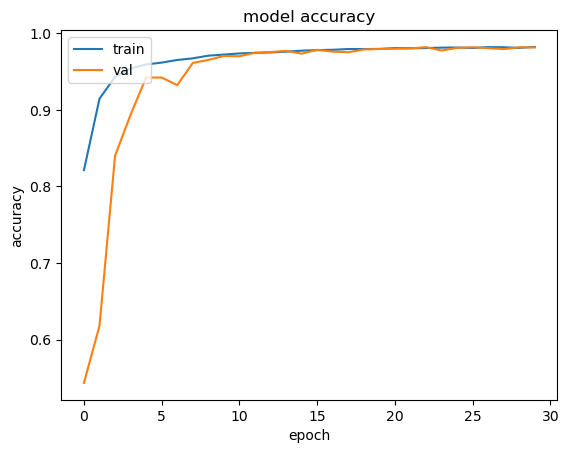

In [259]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

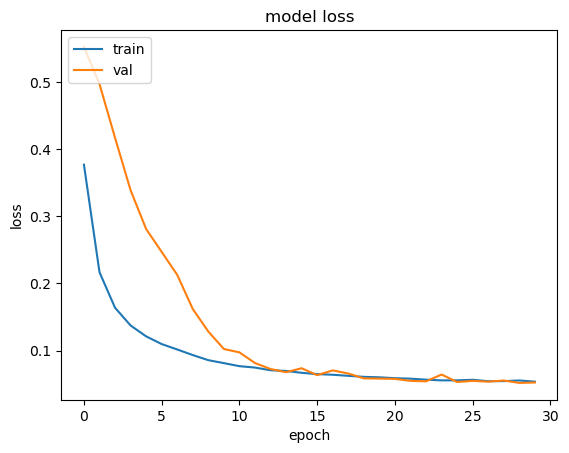

In [260]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [261]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, np.rint(y_pred))
cm

693/693 [==============================] - 2s 2ms/step


array([[10886,   154],
       [  207, 10900]], dtype=int64)

In [262]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [264]:
import itertools  # Add this import statement for itertools

Confusion matrix, without normalization
[[10886   154]
 [  207 10900]]


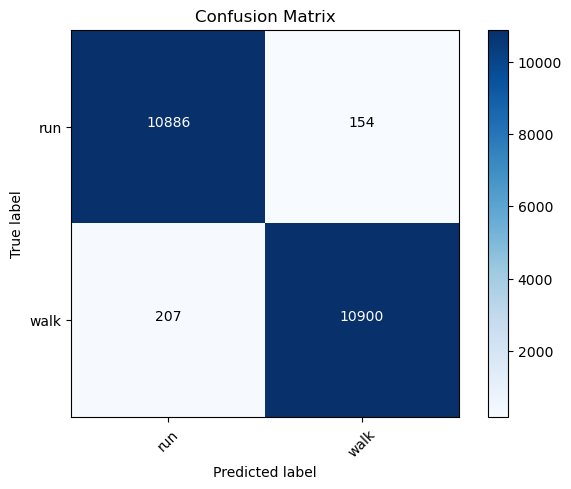

In [265]:
cm_plot_labels = ['run','walk']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

<div style="background-color:#F5F5F5 ; padding:10px">
<h3>RNN MODEL</h3>
</div>

In [370]:
from tensorflow import keras  # Add this import statement
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [371]:
def create_baseline():
    model = keras.Sequential(
    [
        layers.Dense(14, input_shape = (None,7), activation="relu"), ##?
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1,  activation="sigmoid"),
    ]
    )
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [372]:
# Create the RNN model
model_RNN = create_baseline()

In [373]:
# Define checkpoints and early stopping
checkpoint = ModelCheckpoint("rnn_walk_run.h5", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             save_freq='epoch')

early = EarlyStopping(monitor='val_accuracy', 
                      min_delta=0, 
                      patience=7, 
                      verbose=1, 
                      mode='auto')

In [374]:
# Summary of the model architecture
model_RNN.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, None, 14)          112       
                                                                 
 dense_31 (Dense)            (None, None, 20)          300       
                                                                 
 dense_32 (Dense)            (None, None, 10)          210       
                                                                 
 dense_33 (Dense)            (None, None, 5)           55        
                                                                 
 dense_34 (Dense)            (None, None, 1)           6         
                                                                 
Total params: 683 (2.67 KB)
Trainable params: 683 (2.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [379]:
# Training the model

model_RNN.fit(X_train, y_train, batch_size=128, epochs=15)

Epoch 1/15
520/520 [==============================] - 2s 2ms/step - loss: 0.2857 - accuracy: 0.8764
Epoch 2/15
520/520 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9656
Epoch 3/15
520/520 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9750
Epoch 4/15
520/520 [==============================] - 1s 2ms/step - loss: 0.0747 - accuracy: 0.9773
Epoch 5/15
520/520 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9786
Epoch 6/15
520/520 [==============================] - 1s 2ms/step - loss: 0.0633 - accuracy: 0.9802
Epoch 7/15
520/520 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9814
Epoch 8/15
520/520 [==============================] - 1s 2ms/step - loss: 0.0577 - accuracy: 0.9821
Epoch 9/15
520/520 [==============================] - 1s 2ms/step - loss: 0.0540 - accuracy: 0.9834
Epoch 10/15
520/520 [==============================] - 1s 2ms/step - loss: 0.0524 - accuracy: 0.9835

In [399]:
from sklearn.neural_network import MLPClassifier
# Initializing 

model = MLPClassifier()

# Training

model.fit(X_train,y_train)

# Predicting

y_predict=model.predict(X_test)

# Testing

accuracy_score(y_test,y_predict)

0.9901115275206575

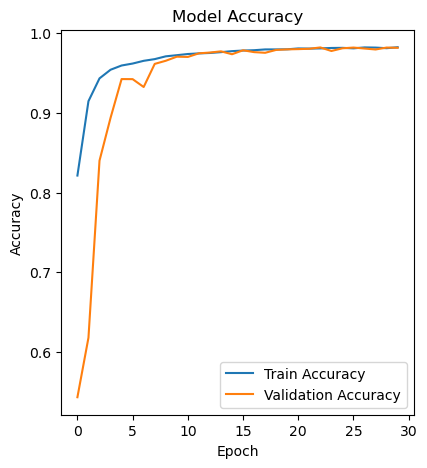

In [383]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

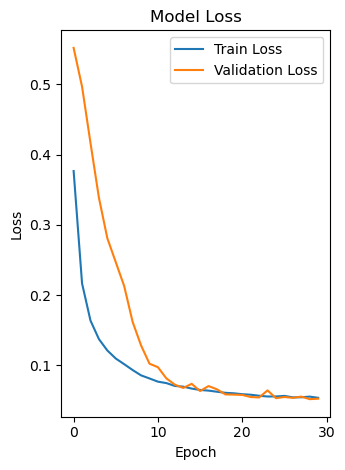

In [384]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [385]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, np.rint(y_pred))
cm

array([[10981,    59],
       [  155, 10952]], dtype=int64)

In [386]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [387]:
import itertools  # Add this import statement for itertools

Confusion matrix, without normalization
[[10981    59]
 [  155 10952]]


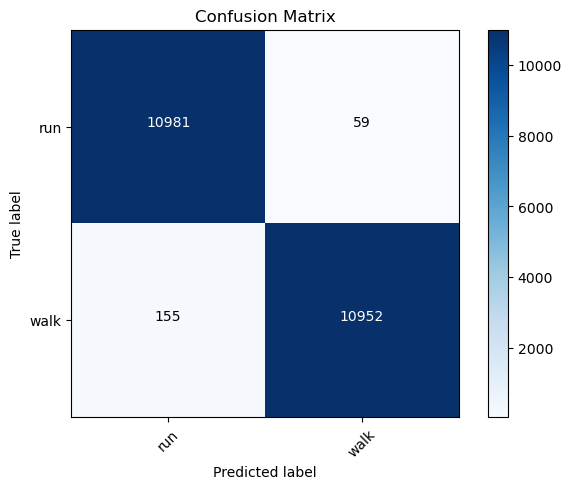

In [388]:
cm_plot_labels = ['run','walk']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

_HYPERPARAMETERTUNNING_

In [411]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [412]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)


In [414]:
# Define the parameter grid for random sampling
param_dist = {
    'n_estimators': np.arange(100, 1000, ),         # Number of trees in the forest
    'max_depth': [None] + list(np.arange(10, 110,)),  # Maximum depth of the trees
    'min_samples_split': np.arange(2, 11),            # Minimum samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11)              # Minimum samples required to be at a leaf node
}


In [415]:
# Create the Randomized Search object
random_search = RandomizedSearchCV(
    estimator=rf_classifier, 
    param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    cv=3,         # Number of cross-validation folds
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1     # Use all available CPU cores for parallelization
)


In [416]:
# Fit the Randomized Search to your data
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25, 26,
                                                      27, 28, 29, 30, 31, 32,
                                                      33, 34, 35, 36, 37, 38, ...],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([100, 101, 102, 103,...
       919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931,
       932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944,
       945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957,
       958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970,
       971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983,
       984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996,
       997, 998, 999])},
                   random_state=42, scoring='accuracy')

In [443]:
# Get the best parameters and estimator from the Randomized Search
best_params = random_search.best_params_
best_rf_classifier = random_search.best_estimator_


In [444]:
# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'n_estimators': 872, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 62}


In [445]:
# Evaluate the best model on the test set
test_accuracy = best_rf_classifier.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

Test Accuracy with Best Model: 0.9913758071070574


------

_**FINAL CONCLUSION**_

_**Logistic Regression(Log)**_: _This model achieved an accuracy score of 0.86. While it's a decent score, it may not be the best choice if higher accuracy is crucial for your task. You might want to consider more complex models if you need better performance._  

_**Decision Tree (Decision)**_: _With an accuracy score of 0.98, the Decision Tree model performs very well on your dataset. It's a strong candidate for your task, and its simplicity makes it easy to interpret._  

_**Random Forest (Random)**_: _The Random Forest model also scored 0.99 in accuracy, indicating excellent performance. Random Forest is an ensemble method based on Decision Trees and is known for its robustness and accuracy._  

_**Support Vector Machine (SVM)**_: _SVM achieved an accuracy score of 0.87, which is reasonable but not as high as the scores of the Decision Tree and Random Forest. SVM can be effective in some cases, but it might not be the best choice for your specific dataset._  

_**XGBoost (XGBoost)**_: _Similar to the Random Forest, XGBoost also scored 0.99 in accuracy. XGBoost is a powerful ensemble algorithm known for its high performance and is often a top choice in competitions and real-world applications._  

_**Convolutional Neural Network (CNN)**_: _The CNN model achieved an accuracy score of 0.98, which is quite impressive if you're working with image data. CNNs are specifically designed for image-related tasks and perform exceptionally well in these domains._  

_**Recurrent Neural Network (RNN)**_: _Similar to XGBoost and Random Forest, RNN scored 0.99 in accuracy. RNNs are well-suited for sequential data and time series tasks and seem to be excelling in your dataset._  

_**These scores suggest that the **Random Forest**, **XGBoost**, and **RNN models** have the highest accuracy among all the models**_


_**NOW TO GET MORE ACCURATE MODEL FOR OUR PEOBLEM STATEMENT WE HAVE DONE HYPERPARAMETERTUNNING ON BOTH THE MODEL OF **Random Forest**, **XGBoost** AND THERE IS SLIGHTLY CHNAGE OF MINIMUM POINTS AS THE VALUE IS DECREASED SO BECUASE OF THIS  WE CAN CONCLUDE FROM THAT**_

_**THE **RNN** IS THE BEST SUITED MODEL FOR OUR WALK RUN CLASSIFICATION PROJECT**_ 